#**Study Case 2.A: Evaluating Learning Personalization from Projects of MIT App Inventor: PCA (K-Means)**


---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from prettytable import PrettyTable
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file = "/content/drive/My Drive/appinventor_analysis/dataset.csv"

In [5]:
df = pd.read_csv(file, sep=';')

**1) Seletecting columns to create the model from dataset:**

In [6]:
X = np.array(df.loc[:, ~df.columns.isin(['ProjectID', 'ProjectName', 'AppName', 'AppVersionName'])])

In [7]:
varianceRatio = []
components = 0

while(sum(varianceRatio) < 0.99):
  components = components + 1
  pca = PCA(n_components=components)
  pca.fit(X)
  varianceRatio = pca.explained_variance_ratio_

print(components)
print(varianceRatio)

9
[0.7523838  0.12970905 0.05854567 0.0163817  0.01109321 0.00953833
 0.0065985  0.00490086 0.00170071]


In [8]:
features = []

for i in range(components):
  features.insert(i,'F' + str(i+1))

df2 = pd.DataFrame(pca.transform(df.loc[:, ~df.columns.isin(['ProjectID', 'ProjectName', 'AppName', 'AppVersionName'])]), columns = features)
df2.describe()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05,2.152440e+05
mean,1.406217e-14,8.119130e-15,-1.123960e-14,1.014099e-16,-1.778899e-15,-5.176130e-16,-5.281766e-17,1.690165e-16,6.390937e-17
std,1.774219e+02,7.366694e+01,4.949199e+01,2.617984e+01,2.154350e+01,1.997669e+01,1.661537e+01,1.431936e+01,8.435339e+00
min,-8.071706e+01,-3.702717e+03,-3.426167e+03,-4.631680e+02,-4.765099e+02,-3.806868e+02,-1.772118e+02,-5.215342e+02,-5.949831e+01
25%,-4.974924e+01,-3.036379e+01,-2.231611e+01,-6.035956e+00,-6.031338e+00,-5.978335e+00,-3.301051e+00,-4.952671e+00,-3.962638e-01
50%,-2.593582e+01,-9.138304e+00,-9.539445e+00,-4.744321e+00,-3.122273e+00,-3.986155e+00,-1.979364e+00,-3.354716e+00,-2.752452e-01
75%,1.169921e+01,2.408383e+01,1.596908e+01,-1.862205e+00,1.043827e+00,-9.703445e-01,-6.848060e-01,1.054765e-01,-1.381655e-01
max,1.644384e+04,9.819053e+03,3.960177e+03,2.012631e+03,2.495679e+03,1.976763e+03,2.538029e+03,2.359854e+03,9.965740e+02


In [9]:
X = np.array(df2)

In [10]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
# number of components
n_pcs= pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
dfNew = df.loc[:, ~df.columns.isin(['ProjectID', 'ProjectName', 'AppName', 'AppVersionName'])]
names = dfNew.columns
most_important_names = [names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'F{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df3 = pd.DataFrame(sorted(dic.items()))

df3

,0,1
0,F1,NumberOfTotalBlocks
1,F2,NumberOfUserInterfaceBlocks
2,F3,NumberOfDrawingAnimationBlocks
3,F4,NumberOfMediaBlocks
4,F5,NumberOfStorageBlocks
5,F6,NumberOfConnectivityBlocks
6,F7,NumberOfLayoutBlocks
7,F8,NumberOfSensorsBlocks
8,F9,AppVersionCode


**Calculating the Elbow curve:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

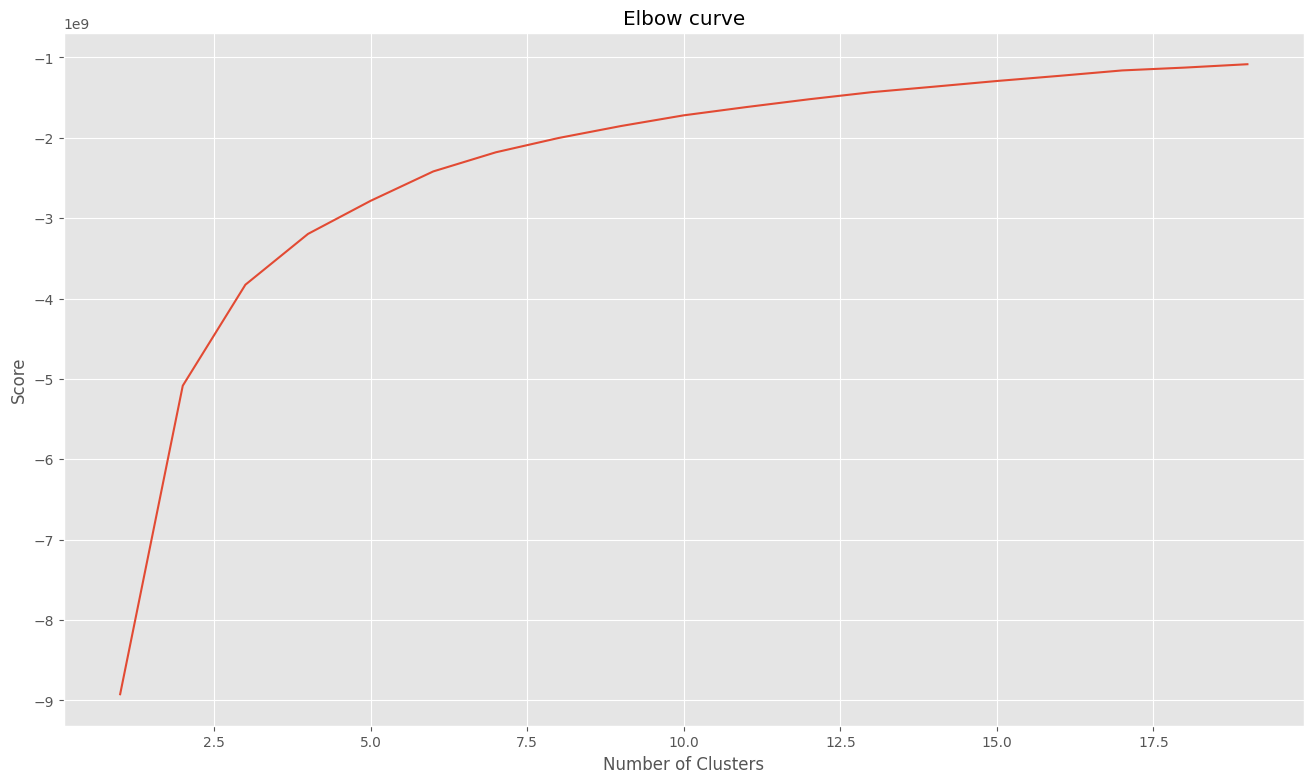

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()

**2) Trying with K=6:**

In [ ]:
kmeans = KMeans(n_clusters=6).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=6).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.40759187102588096


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.8813346425994961


In [ ]:
table = PrettyTable()
table.add_column('F1', [])
table.add_column('F2', [])
table.add_column('F3', [])
table.add_column('F4', [])
table.add_column('F5', [])
table.add_column('F6', [])
table.add_column('F7', [])
table.add_column('F8', [])
table.add_column('F9', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))
table.add_row(np.around(centroids[3],2))
table.add_row(np.around(centroids[4],2))
table.add_row(np.around(centroids[5],2))

print(table)

+----------+---------+--------+---------+--------+---------+---------+---------+-------+
|    F1    |    F2   |   F3   |    F4   |   F5   |    F6   |    F7   |    F8   |   F9  |
+----------+---------+--------+---------+--------+---------+---------+---------+-------+
|  -32.24  |  -11.87 | -10.54 |   0.19  | -1.12  |  -0.36  |  -0.51  |   0.31  | -0.04 |
| 14231.76 | -636.41 | 272.39 | -133.67 | -89.71 | -177.04 | -157.39 | -144.47 | -6.53 |
|  3575.7  |  176.16 | 167.9  |  42.78  | -87.14 |   70.0  |   43.7  |  57.39  |  2.95 |
|  -17.85  |  86.38  | 63.19  |  -1.68  |  0.49  |  -0.23  |  -0.48  |  -2.17  |  -0.0 |
|  94.49   |  -35.76 | -5.61  |  -0.35  |  3.33  |   1.17  |   1.96  |   0.37  |  0.15 |
|  540.44  |  90.77  | -58.94 |  10.25  | 16.16  |   6.48  |   8.21  |   1.7   |  0.26 |
+----------+---------+--------+---------+--------+---------+---------+---------+-------+


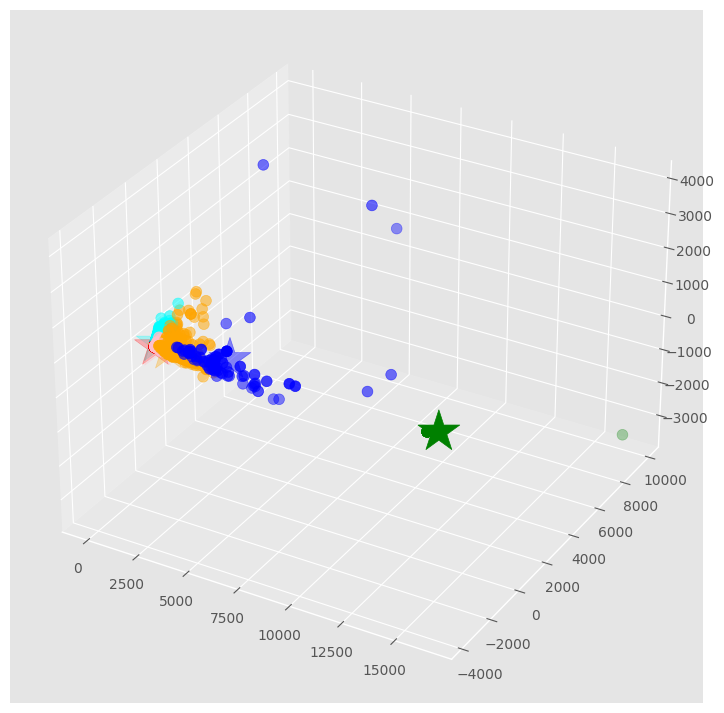

In [ ]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan', 'pink', 'orange']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [ ]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

    color  cantidad
0     red    148949
1   green        18
2    blue        76
3    cyan     30474
4    pink     32483
5  orange      3244


**3) Trying with K=5:**

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=5).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.3798752973216778


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.8248412818063976


In [ ]:
table = PrettyTable()
table.add_column('F1', [])
table.add_column('F2', [])
table.add_column('F3', [])
table.add_column('F4', [])
table.add_column('F5', [])
table.add_column('F6', [])
table.add_column('F7', [])
table.add_column('F8', [])
table.add_column('F9', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))
table.add_row(np.around(centroids[3],2))
table.add_row(np.around(centroids[4],2))

print(table)

+----------+---------+--------+---------+---------+---------+---------+---------+-------+
|    F1    |    F2   |   F3   |    F4   |    F5   |    F6   |    F7   |    F8   |   F9  |
+----------+---------+--------+---------+---------+---------+---------+---------+-------+
|  -14.14  |  -17.54 | -9.91  |   0.02  |   -0.6  |  -0.05  |  -0.18  |   0.22  | -0.01 |
| 13955.78 | -409.12 | 224.86 | -130.66 | -110.06 | -167.23 | -148.72 | -148.03 | -5.58 |
| 2968.56  |   3.12  | 171.14 |  40.38  |  -27.8  |  51.16  |  29.56  |   39.2  |  1.6  |
|  -20.49  |  81.13  | 59.76  |  -1.55  |   0.41  |  -0.42  |  -0.48  |  -1.86  | -0.02 |
|  375.61  |  49.45  | -44.68 |   6.95  |  14.16  |   3.03  |   6.84  |   3.34  |  0.43 |
+----------+---------+--------+---------+---------+---------+---------+---------+-------+


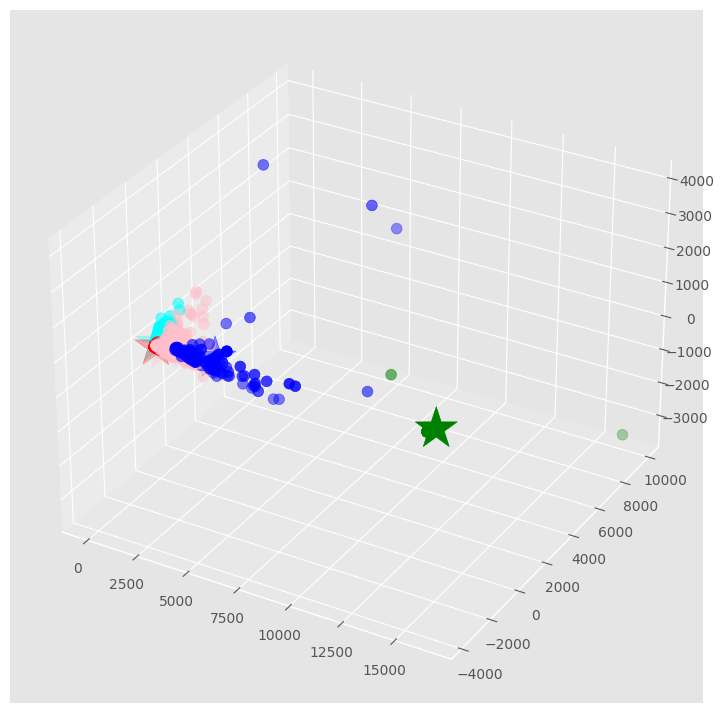

In [ ]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan', 'pink']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [ ]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

   color  cantidad
0    red    174591
1  green        19
2   blue       110
3   cyan     33696
4   pink      6828


**4) Trying with K=4:**

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=4).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [ ]:
score = silhouette_score(X, preds)
print(score)

0.7400183923143842


**Calculating Davies-Bouldin (DB) Score:**

In [ ]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.7142228065894557


In [ ]:
table = PrettyTable()
table.add_column('F1', [])
table.add_column('F2', [])
table.add_column('F3', [])
table.add_column('F4', [])
table.add_column('F5', [])
table.add_column('F6', [])
table.add_column('F7', [])
table.add_column('F8', [])
table.add_column('F9', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))
table.add_row(np.around(centroids[3],2))

print(table)

+----------+---------+--------+---------+---------+---------+---------+---------+-------+
|    F1    |    F2   |   F3   |    F4   |    F5   |    F6   |    F7   |    F8   |   F9  |
+----------+---------+--------+---------+---------+---------+---------+---------+-------+
|  -15.58  |  -1.82  |  1.22  |  -0.24  |  -0.45  |  -0.12  |  -0.23  |  -0.12  | -0.02 |
| 13955.78 | -409.12 | 224.86 | -130.66 | -110.06 | -167.23 | -148.72 | -148.03 | -5.58 |
|  364.93  |  53.24  | -38.24 |   6.72  |   13.7  |   2.97  |   6.61  |   3.19  |  0.42 |
| 2968.56  |   3.12  | 171.14 |  40.38  |  -27.8  |  51.16  |  29.56  |   39.2  |  1.6  |
+----------+---------+--------+---------+---------+---------+---------+---------+-------+


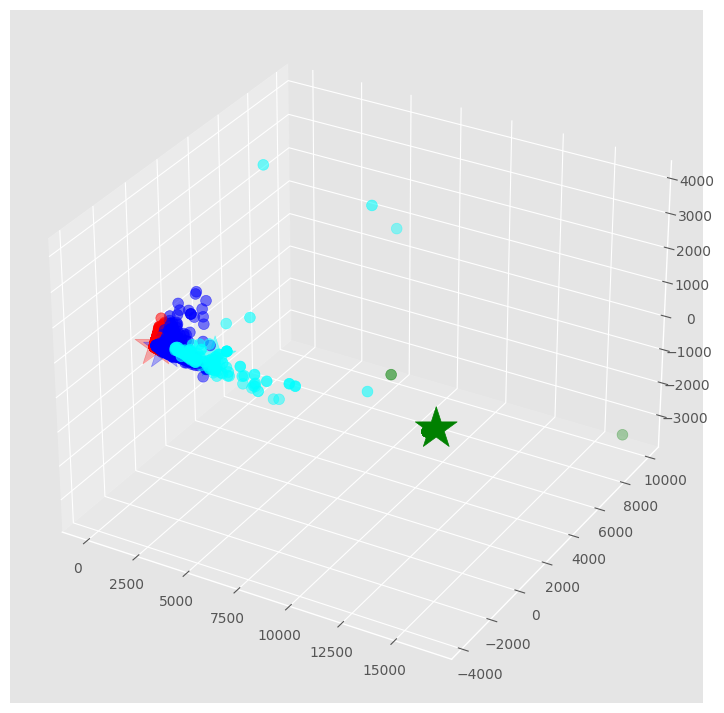

In [ ]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [ ]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

   color  cantidad
0    red    207867
1  green        19
2   blue      7248
3   cyan       110


**5) Trying with K=3:**

In [12]:
kmeans = KMeans(n_clusters=3).fit(X)

centroids = kmeans.cluster_centers_

preds = KMeans(n_clusters=3).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculating Silhouette Score:**

In [13]:
score = silhouette_score(X, preds)
print(score)

0.7824117560821855


**Calculating Davies-Bouldin (DB) Score:**

In [14]:
score = davies_bouldin_score(X, kmeans.labels_)
print(score)

0.6809218583835256


In [15]:
table = PrettyTable()
table.add_column('F1', [])
table.add_column('F2', [])
table.add_column('F3', [])
table.add_column('F4', [])
table.add_column('F5', [])
table.add_column('F6', [])
table.add_column('F7', [])
table.add_column('F8', [])
table.add_column('F9', [])

table.add_row(np.around(centroids[0],2))
table.add_row(np.around(centroids[1],2))
table.add_row(np.around(centroids[2],2))

print(table)

+----------+--------+--------+--------+---------+--------+-------+-------+-------+
|    F1    |   F2   |   F3   |   F4   |    F5   |   F6   |   F7  |   F8  |   F9  |
+----------+--------+--------+--------+---------+--------+-------+-------+-------+
|  -13.75  | -1.63  |  1.07  | -0.17  |  -0.39  | -0.09  | -0.21 | -0.11 | -0.01 |
| 12132.66 | -82.55 | 565.09 | -87.99 | -133.32 | -59.66 | -93.3 | 36.53 | -4.86 |
|  461.38  | 61.85  | -42.91 |  6.73  |  15.24  |  3.84  |  8.3  |  3.83 |  0.26 |
+----------+--------+--------+--------+---------+--------+-------+-------+-------+


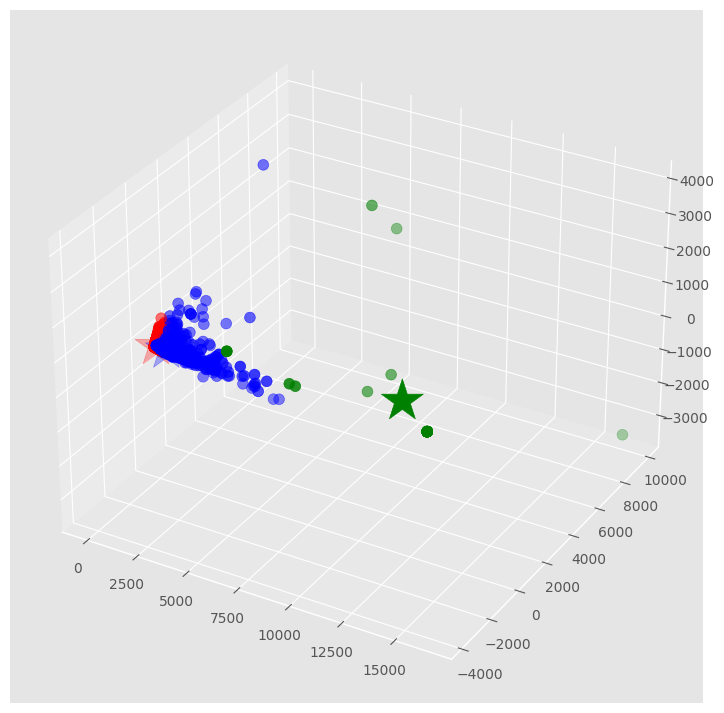

In [16]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_
colores = ['red','green','blue']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

plt.show()

In [17]:
copy = pd.DataFrame()

copy['ProjectID'] = df['ProjectID'].values
copy['label'] = labels

cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

   color  cantidad
0    red    209666
1  green        26
2   blue      5552
